# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [2]:
! pip install GPy==1.9.9

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [31]:
data.dropna(inplace=True)
data

FR
0    1410875.0
1    1792043.0
2    1459047.0
3    1788890.0
4    1738408.0
..         ...
361  1359100.0
362  1519314.0
363  1656608.0
364  1239037.0
365  1397949.0

[366 rows x 1 columns]

In [32]:
y = np.array(data.values)
X = np.array(data.index)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [34]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train_trans = scaler.fit_transform(y_train)
y_test_trans = scaler.fit_transform(y_test)

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

Text(0, 0.5, 'Electricity Consumption')

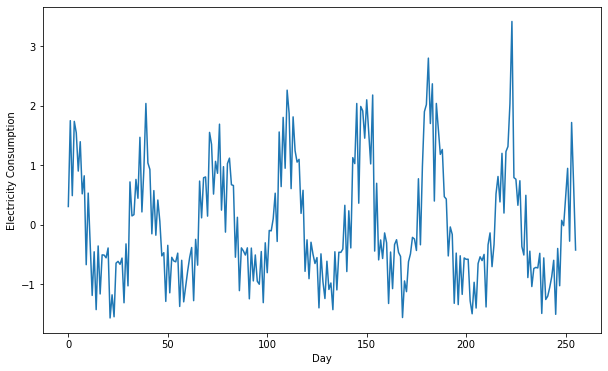

In [35]:
### BEGIN SOLUTION (do not delete this comment!)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X_train, y_train_trans)
ax.set_xlabel('Day')
ax.set_ylabel('Electricity Consumption')
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

Optimization restart 1/5, f = 216.67769715622217
Optimization restart 2/5, f = 378.078606810108
Optimization restart 3/5, f = 253.66558397116148
Optimization restart 4/5, f = 246.11583461905158
Optimization restart 5/5, f = 246.1158487136775

Name : GP regression
Objective : 216.67769715622217
Number of Parameters : 11
Number of Optimization Parameters : 11
Updates : True
Parameters:
  GP_regression.                |                  value  |  constraints  |  priors
  sum.poly.variance             |  8.696957861496352e-08  |      +ve      |        
  sum.poly.scale                |  5.049595811706731e-06  |      +ve      |        
  sum.poly.bias                 |    0.05882571162007665  |      +ve      |        
  sum.rbf.variance              |   0.020055476625858073  |      +ve      |        
  sum.rbf.lengthscale           |      5.990121622129672  |      +ve      |        
  sum.std_periodic.variance     |     1.1904369361337037  |      +ve      |        
  sum.std_periodic.period

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fc753378f40>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fc753386400>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fc7533866d0>]}

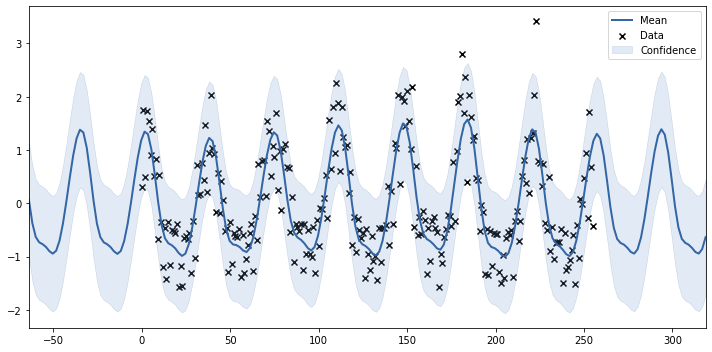

In [39]:
import GPy 
import random

random.seed(69)
# defining the covariance function
#kernal =  GPy.kern.RBF(2) * GPy.kern.StdPeriodic(1, variance=0.4, period=40)
k_trend = GPy.kern.Poly(1, order=1) + GPy.kern.RBF(1)
k_periodicity = GPy.kern.StdPeriodic(1, period=35)
k_noise = GPy.kern.White(1) * GPy.kern.Linear(1)
kernel = k_trend + k_periodicity + k_noise

model = GPy.models.GPRegression(X_train, y_train_trans, kernel)
model.optimize(optimizer='lbfgs')
model.optimize_restarts(5)
#model.optimize_restarts(num_restarts=10)
print(model)
model.plot(figsize=(10, 5))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

Text(0, 0.5, 'Predicted Value')

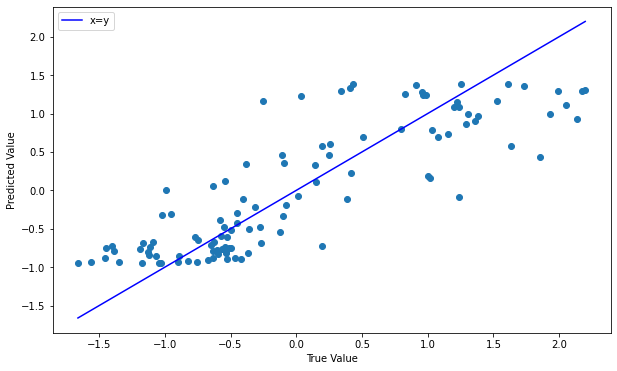

In [40]:
### BEGIN SOLUTION (do not delete this comment!)
y_pred = model.predict(X_test)[0]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_trans, y_pred)

p1 = max(max(y_pred), max(y_test_trans))
p2 = min(min(y_pred), min(y_test_trans))
plt.plot([p1, p2], [p1, p2], 'b-', label="x=y")

plt.legend()
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [41]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(y_test_trans, y_pred)
### END SOLUTION (do not delete this comment!)

0.7189752657130637

## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [14]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

In [15]:
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstance betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

In [16]:
### BEGIN SOLUTION (do not delete this comment!)
import warnings
warnings.filterwarnings("ignore")

def dim_analysis(data):
    k1 = 5 # start of interval(included)
    k2 = 60 # end of interval(included)
    nb_iter = 15 # more iterations more accuracy

    intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                                 data, 
                                 mode='bootstrap', 
                                 nb_iter=nb_iter, # nb_iter for bootstrapping
                                 k1=k1, k2=k2)
    intdim_k_repeated = np.array(intdim_k_repeated)

    x = np.arange(k1, k2+1)

    plt.figure(figsize=(14, 4))
    avg_dim = np.mean(intdim_k_repeated, axis=0)
    plt.plot(x, avg_dim, 'b', label='Mean')

    ci = 2 * np.std(intdim_k_repeated, axis=0)
    plt.fill_between(x, avg_dim - ci, avg_dim + ci, alpha=0.2, label='CI=95%', color='g')
    plt.xlabel("Nearest Neigbours")
    plt.ylabel("Intrinsic Dimensionality")
    plt.legend()
    plt.show()
### END SOLUTION (do not delete this comment!)

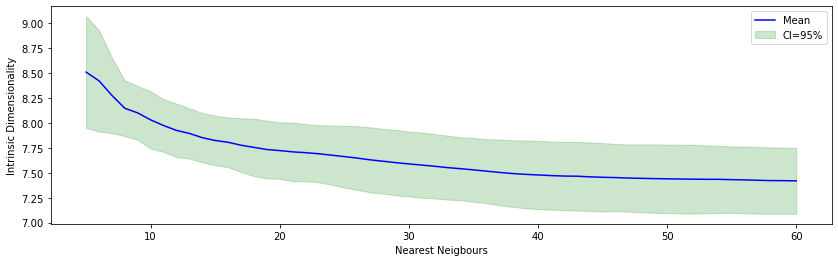

In [17]:
dim_analysis(data)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

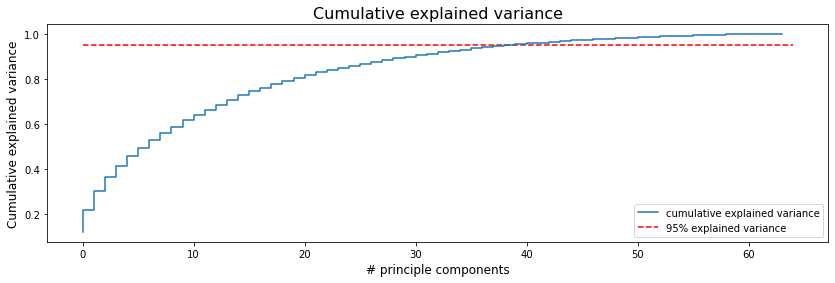

In [18]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA
pca = PCA().fit(data)

plt.figure(figsize=(14, 4))

plt.step(range(64), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.hlines(y=0.95, xmin=0, xmax=len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')
plt.legend(loc='lower right')
plt.show()


### END SOLUTION (do not delete this comment!)

In [19]:

def explainedVariance(percentage, images): 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

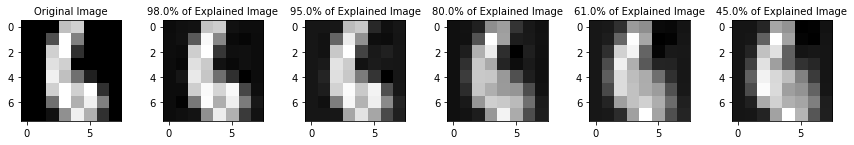

In [20]:
### BEGIN SOLUTION (do not delete this comment!)
f, ax  = plt.subplots(1,6, figsize=(12, 6))
f.tight_layout()

six = dg.data[6]
comp_arr = [None, .98, .95, .8, .61, .45]
for i in range(6):
    if comp_arr[i] is None:
        title = 'Original Image'
        ax[i].imshow(six.reshape(-1,1).reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
    else:
        title = '{}% of Explained Image'.format(comp_arr[i]*100)
        new_six = explainedVariance(comp_arr[i], dg.data)[6]
        
        ax[i].imshow(new_six.reshape(-1,1).reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest');
        
    ax[i].set_title(title, fontsize=10)


### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [21]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [22]:
### BEGIN SOLUTION (do not delete this comment!)
num_dim = 8
y = dg.target
models = [PCA(n_components=num_dim),
          FastICA(n_components=num_dim),
          Isomap(n_components=num_dim, eigen_solver='dense')]
labels = ['PCA', 'FastICA', 'Isomap']
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
LogReg = LogisticRegression(solver = 'lbfgs')

scores = {}
for model, label in zip(models, labels):
    X = model.fit_transform(data)
    
    acc_arr = []
    # Repeated K-Fold cross validator
    for train_index, test_index in rkf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # assessing our accuracy via Logistic Regression
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc_arr.append(accuracy)
    scores[label] = acc_arr

for k, v in scores.items():
    print('{}: {}'.format(k, np.mean(v)))
### END SOLUTION (do not delete this comment!)


PCA: 0.8725652532755597
FastICA: 0.7150943980191891
Isomap: 0.9530625193438564


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [23]:
### BEGIN SOLUTION (do not delete this comment!)
print('T test with alternative hypothesis that Isomap has greater accuracy than PCA')
statistic, p_val = stats.ttest_ind(scores['Isomap'], scores['PCA'] )
print('Statistic: {} p_value: {}'.format(statistic, p_val))

print('T test with alternative hypothesis that Isomap has greater accuracy than FastICA')
statistic, p_val = stats.ttest_ind(scores['Isomap'], scores['FastICA'])
print('Statistic: {} p_value: {}'.format(statistic, p_val))
### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic: 13.08563871206771 p_value: 1.880004337254399e-13
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistic: 22.659502395996043 p_value: 1.4982673421427805e-19


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

- ICA: This method is also a linear dimensionality method and uses linear transformation. ICA treats all components equally important. ICA isn't typically used to reduce dimension typically. It is typically used as an unmixing technique for mixed signals. 
- PCA: Similarly, this method is also a linear dimensionality method and uses linear transformation. Unlike ICA, not all components are treated equally. PCA discard principal components with minmimal eigenvalues and keep the components with singificant e-values. 
- Isomap: Unlike the 2 methods above, this method uses a nonlinear transformation. This is why it performs better and yields higher accuracy. The data itself is non-linear. 

As mentioned in the points above, with PCA and ICA, if the data is not linearly seperable, they will perform poorly. On the other hand, this will not happen with Isomap and its nonlinear transformation. 


*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [24]:
import numpy as np

In [43]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [46]:
### BEGIN SOLUTION (do not delete this comment!)
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

for i in range(10,200,10):
    pca = PCA(n_components=i)
    x_fit = pca.fit(x_train)
    x_train_tr = x_fit.transform(x_train)
    x_test_tr  = x_fit.transform(x_test)

    knn.fit(x_train_tr, y_train)
    y_pred = knn.predict(x_test_tr)
    acc = accuracy_score(y_test, y_pred)
    print('n_component: {}, accuracy: {}'.format(i, acc))
    if acc >= 0.93:
        break
### END SOLUTION (do not delete this comment!)


n_component: 10, accuracy: 0.7397
n_component: 20, accuracy: 0.8769
n_component: 30, accuracy: 0.9122
n_component: 40, accuracy: 0.9244
n_component: 50, accuracy: 0.9279
n_component: 60, accuracy: 0.9304


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [3]:
import numpy as np

True number of clusters is 15


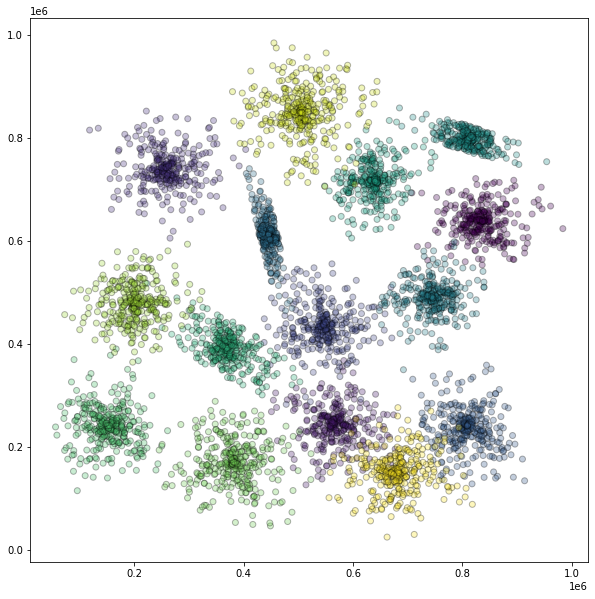

In [100]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [99]:
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [32]:
### BEGIN SOLUTION (do not delete this comment!)
clfs = {'KMeans': KMeans(n_clusters=15), 
        'GaussianMixture': GaussianMixture(n_components=15), 
        'Birch': Birch(n_clusters=15), 
        'AgglomerativeClustering': AgglomerativeClustering(n_clusters=15)}
params = [{'n_init': [5, 10, 15]}, 
          {'covariance_type': ['full', 'tied', 'diag', 'spherical']}, 
          {'threshold': [5, 10, 15, 20]}, 
          {'linkage':['ward', 'complete', 'average', 'single']}]

for (lab, clf), param in zip(clfs.items(), params):
    print(lab)
    if lab == 'AgglomerativeClustering':
        clf.fit(points, labels)
        
        sil_score = silhouette_score(clf.labels_.reshape(-1,1), labels)
        print('Silhouette_score: {}'.format(sil_score))

        mut_score = mutual_info_score(labels, clf.labels_)
        print('Mutual_info_score: {}'.format(mut_score))
    else:
        grd = GridSearchCV(clf, param, n_jobs = -1, scoring ='mutual_info_score') 
        grd.fit(points, labels)
        print('Best params: {}'.format(grd.best_params_))
        
        y_pred = grd.predict(points)
        sil_score = silhouette_score(y_pred.reshape(-1,1), labels)
        print('Silhouette_score: {}'.format(sil_score))

        mut_score = mutual_info_score(labels, y_pred)
        print('Mutual_info_score: {}'.format(mut_score))
        print()
    
### END SOLUTION (do not delete this comment!)

KMeans
Best params: {'n_init': 5}
Silhouette_score: 0.7300771462738898
Mutual_info_score: 2.560612815598387

GaussianMixture
Best params: {'covariance_type': 'full'}
Silhouette_score: 0.7868583149860424
Mutual_info_score: 2.5666871549226036

Birch
Best params: {'threshold': 5}
Silhouette_score: 0.6358017797815118
Mutual_info_score: 2.5077832875665407

AgglomerativeClustering
Silhouette_score: 0.6358017797815118
Mutual_info_score: 2.5077832875665407


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

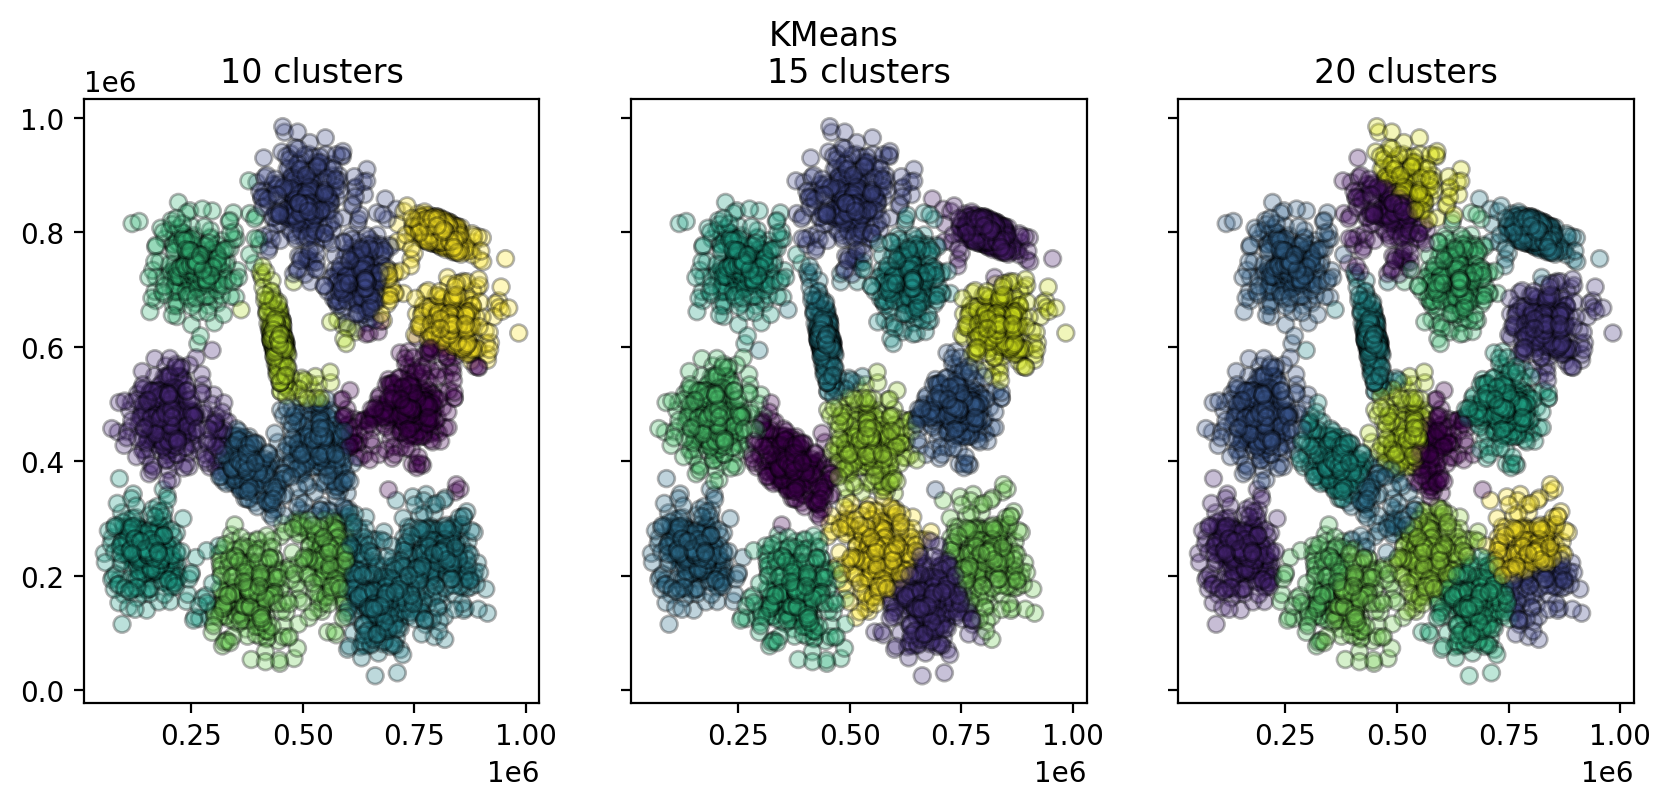

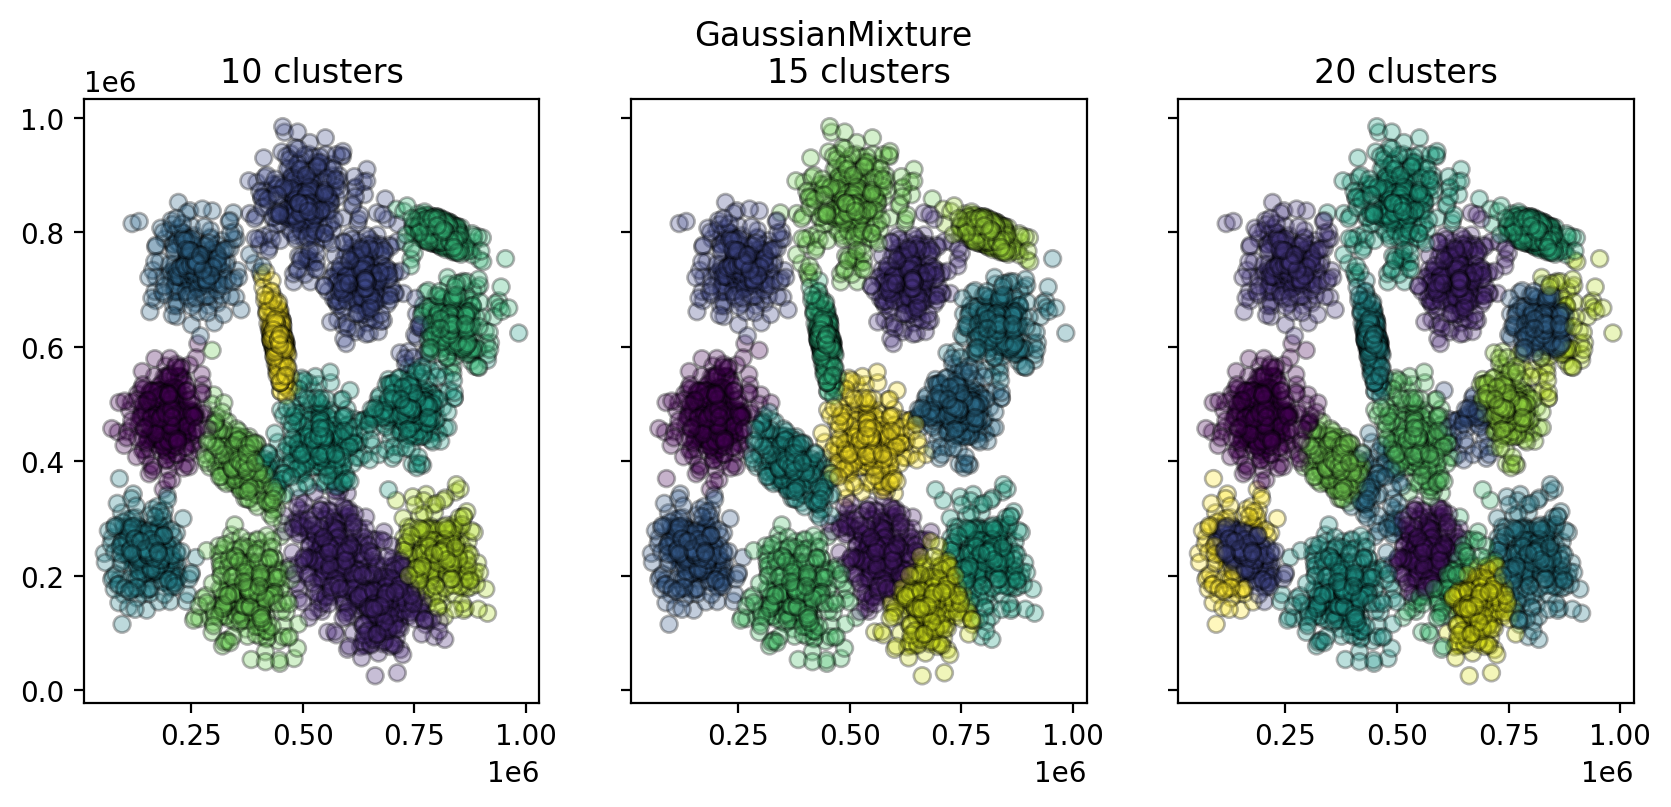

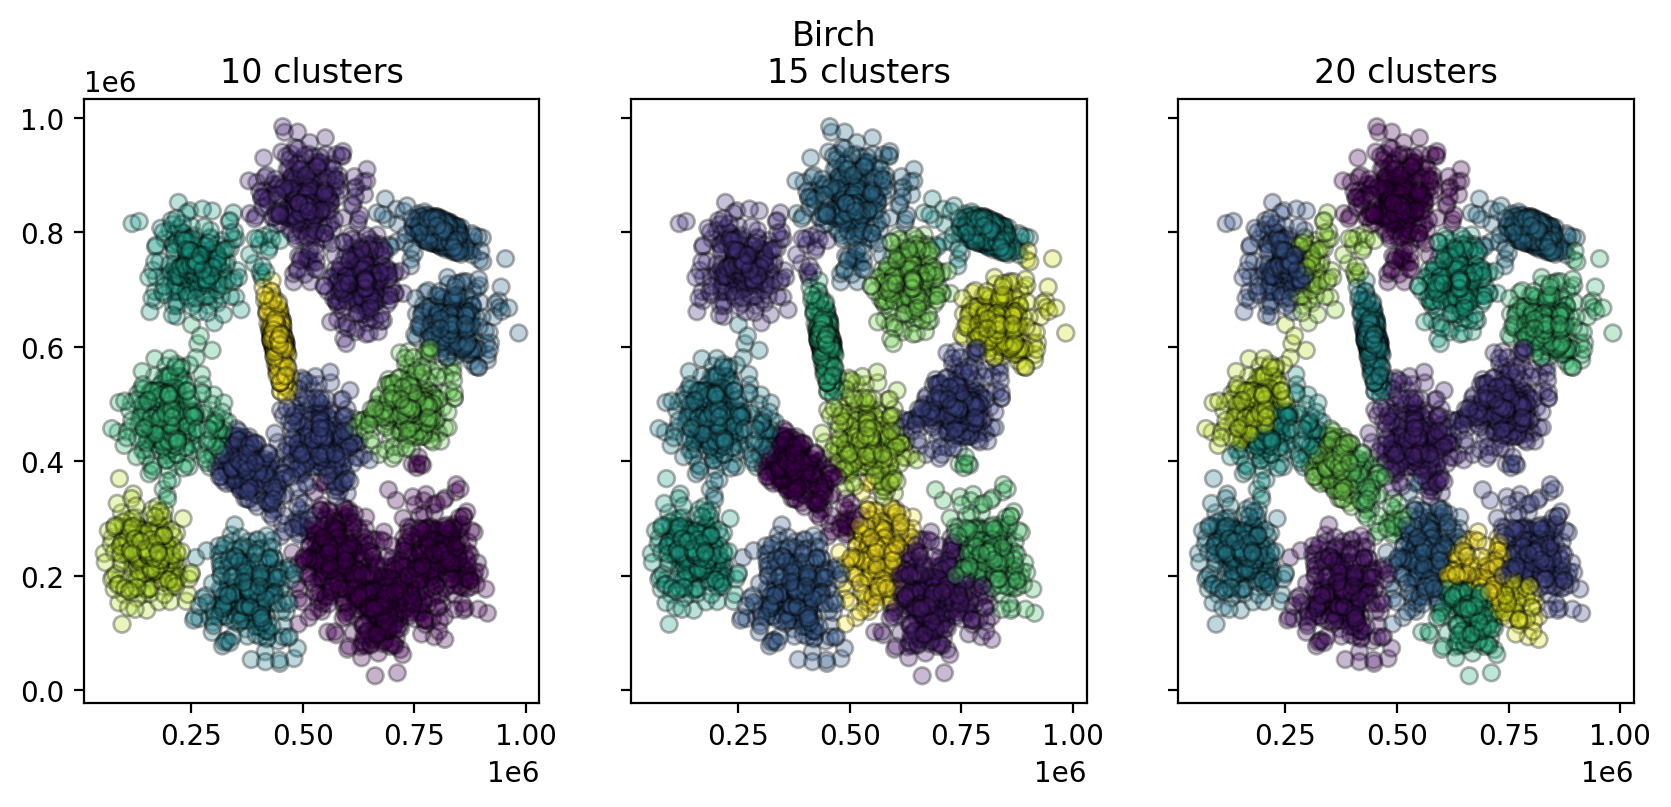

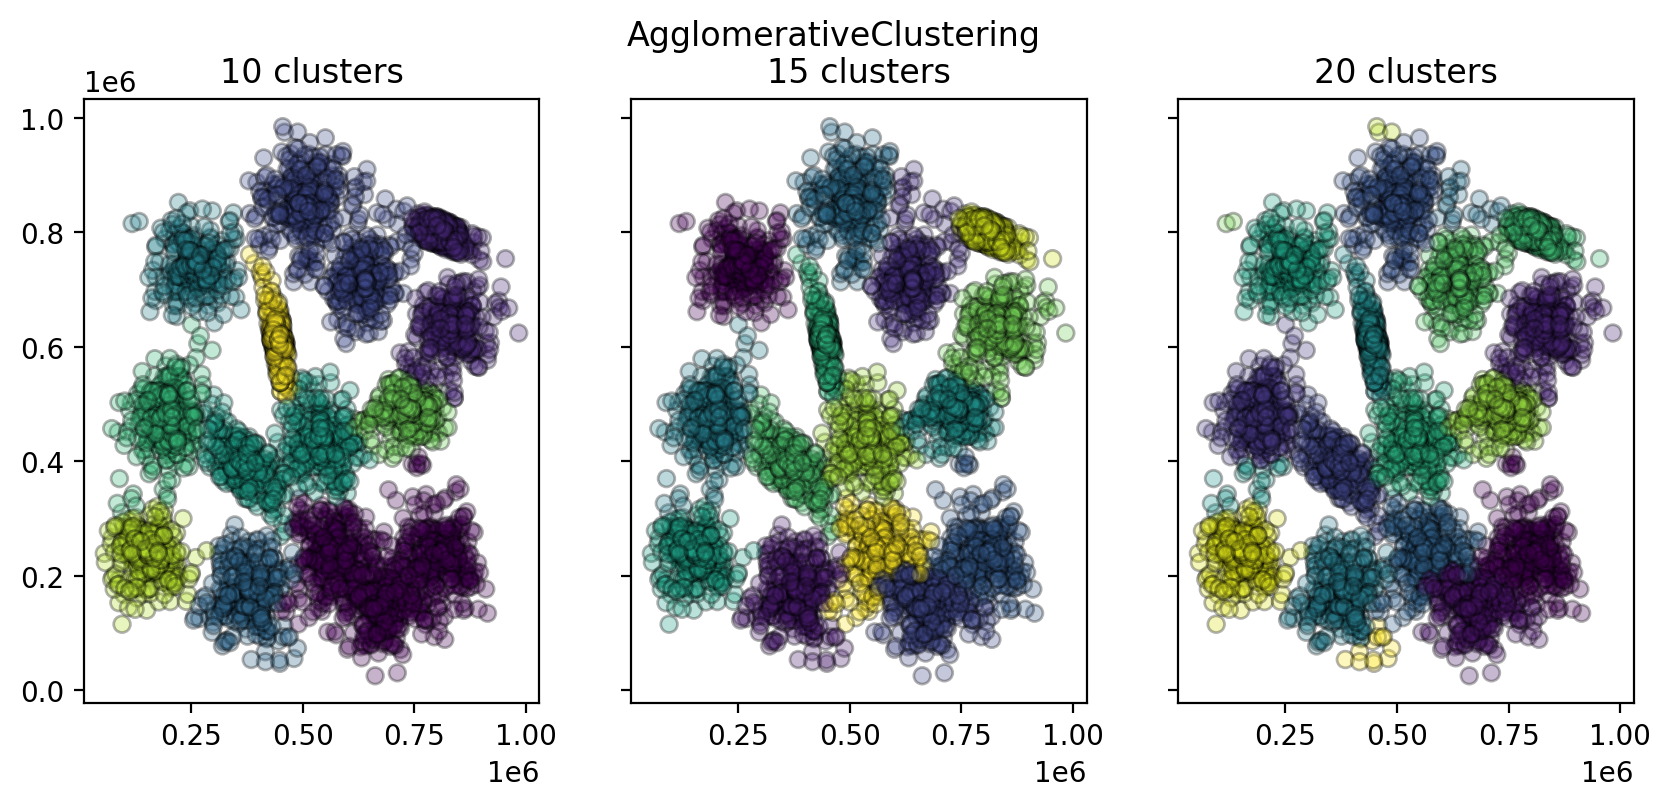

In [101]:
## BEGIN SOLUTION (do not delete this comment!)
clfs = {'KMeans': KMeans(random_state=69), 
        'GaussianMixture': GaussianMixture(random_state=69, covariance_type='full'), 
        'Birch': Birch(branching_factor = 2, threshold = 15), 
        'AgglomerativeClustering': AgglomerativeClustering(linkage='average')}
          
sil_scores = {'KMeans': [], 
              'GaussianMixture': [], 
              'Birch': [],
              'AgglomerativeClustering': []}
mut_scores = {'KMeans': [], 
              'GaussianMixture': [], 
              'Birch': [],
              'AgglomerativeClustering': []}

for lab, clf in clfs.items(): 
    fig, axes = plt.subplots(1, 3, figsize=(10,4), sharey=True, dpi=200)
    plt.suptitle(lab)
    idx = 0
        
    for i in np.arange(10, 21):
        if lab == 'GaussianMixture':
            clf.set_params(n_components = i)
        else:
            clf.set_params(n_clusters = i)
  
        clf.fit(points, labels)
        pred = clf.labels_ if lab == 'AgglomerativeClustering' else clf.predict(points)
        
        sil_score = silhouette_score(pred.reshape(-1,1), labels)
        sil_scores[lab].append(sil_score)

        mut_score = mutual_info_score(labels, pred)
        mut_scores[lab].append(mut_score)  
        
        if i % 5 == 0:
            axes[idx].scatter(points[:,0], points[:,1], c=pred, alpha=0.3, edgecolor='k')
            axes[idx].set_title('{} clusters'.format(i))
            idx += 1
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


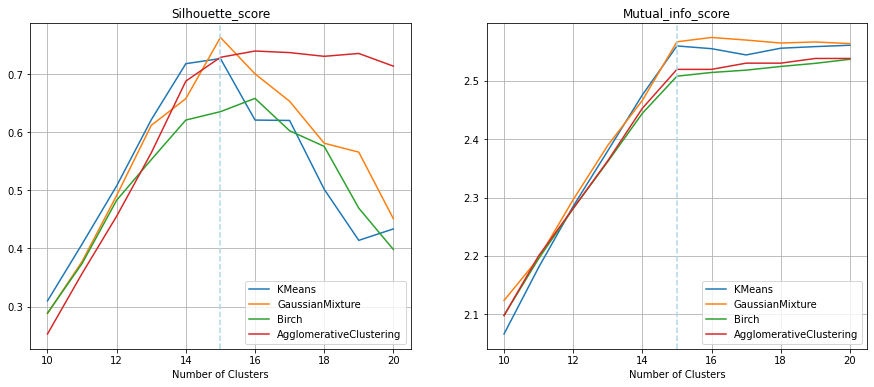

In [103]:
### BEGIN SOLUTION (do not delete this comment!)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

big_dicc = [sil_scores, mut_scores]
labels = ['Silhouette_score', 'Mutual_info_score']
num_clust = np.arange(10, 21)

for dicc, ax, lab in zip(big_dicc, axes, labels):
    ax.set_title(lab)
    for k, v in dicc.items():
        ax.plot(num_clust, v, label = k)
    ax.axvline(15, linestyle='dashed', color='lightblue')
    ax.legend()
    ax.grid()
    ax.set_xlabel("Number of Clusters")
### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [114]:
### BEGIN SOLUTION (do not delete this comment!)
from scipy import stats
num_clusters = np.arange(10, 21)
sample_number = 50
sample_size = len(points)//5

ci_upper = []
ci_lower = []
avg_scores = []

for cluster in num_clusters:
    sil_scores = []
    print('Number of clusters: {}'.format(cluster))
    
    for sample_num in range(sample_number):
        rand_idx = np.random.randint(0, len(points), sample_size)
        sample = points[rand_idx,:]
        
        pred = KMeans(n_clusters=cluster).fit_predict(sample)
        sil_scores.append(silhouette_score(sample, pred))
        
    avg_scores.append(np.mean(sil_scores))    
    ci = stats.norm.interval(0.95, loc=np.mean(sil_scores), scale=np.std(sil_scores))
    ci_lower.append(ci[0])
    ci_upper.append(ci[1])
    
    print('\t Variance: {}'.format(np.var(sil_scores)))
    print('\t Confidence interval: ({}, {})'.format(ci[0], ci[1]))
    print()

### END SOLUTION (do not delete this comment!)

Number of clusters: 10
	 Variance: 0.0001098764766910751
	 Confidence interval: (0.49968751132166617, 0.5407769727721025)

Number of clusters: 11
	 Variance: 0.00013151162285189943
	 Confidence interval: (0.5180782082391302, 0.5630313609040203)

Number of clusters: 12
	 Variance: 9.358627490748439e-05
	 Confidence interval: (0.5426081346754631, 0.580529517626999)

Number of clusters: 13
	 Variance: 9.981469670517771e-05
	 Confidence interval: (0.5677895720476952, 0.6069525161195094)

Number of clusters: 14
	 Variance: 6.681143021757288e-05
	 Confidence interval: (0.5986671463139106, 0.6307079551634067)

Number of clusters: 15
	 Variance: 6.877908405182842e-05
	 Confidence interval: (0.6113071617514569, 0.6438163616253485)

Number of clusters: 16
	 Variance: 7.906343694326656e-05
	 Confidence interval: (0.5965026413406862, 0.6313577091065137)

Number of clusters: 17
	 Variance: 0.00012251975105717224
	 Confidence interval: (0.5767305087680293, 0.6201196584904115)

Number of clusters: 18

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Text(0.5, 0, 'Number of Clusters')

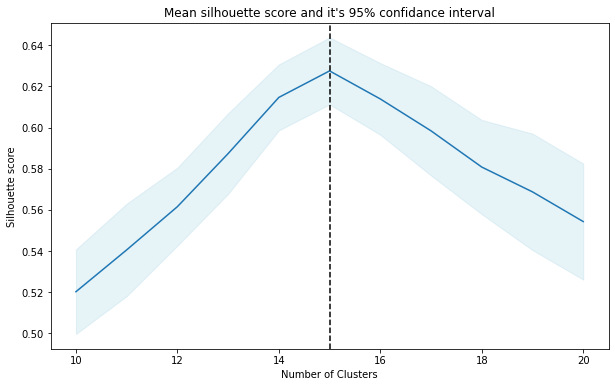

In [117]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(10,6))
plt.plot(num_clusters, avg_scores)
plt.fill_between(num_clusters, ci_upper, ci_lower, alpha=0.3,color='lightblue')

plt.title('Mean silhouette score and it\'s 95% confidance interval')
plt.axvline(15,linestyle='dashed', c='black')
plt.ylabel('Silhouette score')
plt.xlabel('Number of Clusters')  

### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [12]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [30]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')

clfs = {'IsolationForest': IsolationForest(), 
       'LocalOutlierFactor': LocalOutlierFactor(novelty=True), 
       'EllipticEnvelope': EllipticEnvelope()}
data  = {'IsolationForest': {'scores': [], 'anamoly': []}, 
           'LocalOutlierFactor': {'scores': [], 'anamoly': []}, 
           'EllipticEnvelope': {'scores': [], 'anamoly': []}}

for lab, clf in clfs.items():
    clf.fit(train_X)
    scores = clf.decision_function(train_X)
    data[lab]['scores'] = scores
    
    anamoly = clf.predict(test_X)
    data[lab]['anamoly'] = anamoly
data

{'IsolationForest': {'scores': array([0.11166813, 0.08868008, 0.04574447, ..., 0.12913402, 0.12746554,
         0.13054709]),
  'anamoly': array([1, 1, 1, ..., 1, 1, 1])},
 'LocalOutlierFactor': {'scores': array([ 0.49582297,  0.51772035, -0.7964987 , ...,  0.49428922,
          0.51111369,  0.49597997]),
  'anamoly': array([ 1,  1, -1, ...,  1,  1,  1])},
 'EllipticEnvelope': {'scores': array([8364.97915347, 8322.35698107, 8346.0287849 , ..., 8345.47874005,
         7886.12904058, 8265.65122555]),
  'anamoly': array([ 1,  1,  1, ...,  1,  1, -1])}}

In [47]:
### BEGIN SOLUTION (do not delete this comment!)
# impurity estimation on test data
contamination = np.mean(test_y)
contamination
### END SOLUTION (do not delete this comment!)

0.01693743518838576

In [18]:
def remap(x):
  result = np.empty_like(x)
  result[x<0],result[x>0] = 1,0
  return result

In [58]:
### BEGIN SOLUTION (do not delete this comment!)
# Choose three anomaly detection models
clfs = {'IsolationForest': IsolationForest(), 
       'LocalOutlierFactor': LocalOutlierFactor(novelty=True), 
       'EllipticEnvelope': EllipticEnvelope()}

for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    for lab, clf in clfs.items():
        clf.set_params(contamination=contamination*i)
        clf.fit(train_X)
        pred = clf.predict(test_X)
        pred = remap(pred) # (-1, 1) to (1, 0)
        
        c = np.round(contamination * i, 3)
        precision = np.round(precision_score(test_y, pred, average = 'micro'), 3)
        roc_auc = np.round(roc_auc_score(test_y, pred), 3)
        print('{}: Contamination: {}  ROC/AUC: {}  Precision: {}'.format(lab, c, roc_auc, precision))
### END SOLUTION (do not delete this comment!)

IsolationForest: Contamination: 0.002  ROC/AUC: 0.51  Precision: 0.983
LocalOutlierFactor: Contamination: 0.002  ROC/AUC: 0.499  Precision: 0.981
EllipticEnvelope: Contamination: 0.002  ROC/AUC: 0.499  Precision: 0.982
IsolationForest: Contamination: 0.017  ROC/AUC: 0.742  Precision: 0.986
LocalOutlierFactor: Contamination: 0.017  ROC/AUC: 0.5  Precision: 0.963
EllipticEnvelope: Contamination: 0.017  ROC/AUC: 0.65  Precision: 0.981
IsolationForest: Contamination: 0.169  ROC/AUC: 0.862  Precision: 0.846
LocalOutlierFactor: Contamination: 0.169  ROC/AUC: 0.506  Precision: 0.817
EllipticEnvelope: Contamination: 0.169  ROC/AUC: 0.807  Precision: 0.837


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [23]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.ensemble import IsolationForest
# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

clf = RandomForestClassifier()
for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    clf.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    y_pred = clf.predict(test_X.iloc[test_index])
    
    roc_auc = roc_auc_score(test_y.iloc[test_index], y_pred)
    roc_auc_scores.append(roc_auc)
    
    pr = precision_score(test_y.iloc[test_index], y_pred)
    pr_score.append(pr)

print('ROC/AUC mean: {} std: {}'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))
print('Precision mean: {} std: {}'.format(np.mean(pr_score), np.std(pr_score)))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.8992976278724983 std: 0.04434261886148361
Precision mean: 0.9266666666666665 std: 0.11718930554164629


Try to enhance the classifier performance using Anomaly detection methods

In [29]:
### BEGIN SOLUTION (do not delete this comment!)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

anomaly_detect = IsolationForest()
clf = RandomForestClassifier()

for train_index, test_index in skf.split(test_X, test_y):
    anomaly_detect.fit(test_X.iloc[train_index])
    anomoly_pred = anomaly_detect.predict(test_X.iloc[test_index])
    anomoly_pred = remap(anomoly_pred)
    
    clf.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    clf_pred = clf.predict(test_X.iloc[test_index])
    
    final_pred = np.logical_and(anomoly_pred, clf_pred)
    
    roc_auc = roc_auc_score(test_y.iloc[test_index], final_pred)
    roc_auc_scores.append(roc_auc)
    
    pr = precision_score(test_y.iloc[test_index], final_pred)
    pr_score.append(pr)
    
print('ROC/AUC mean: {} std: {}'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))
print('Precision mean: {} std: {}'.format(np.mean(pr_score), np.std(pr_score)))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.8419730664689894 std: 0.08483463969025168
Precision mean: 0.9466666666666667 std: 0.11075498483890765


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*
After trying several anomoly detection methods, I've come to the following conclusion:
- Using ```logical_end``` was much more effective than logical_or. I received horrible results with ```logical_or```. 
- As the chosen classifier was tree based, the obtained accuracy was already quite high. Therefore, even with Anomoly Detection, it did not improve the scores significantly. 
- Per the point above, with less capable classifier such as logistic classifie, the addition of Anomoly Detection will yield much improved results.

*END SOLUTION (do not delete this comment!)*